In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np

In [4]:
Xs6 = np.load("/content/drive/MyDrive/Motor Fault /Dataset/xs_train_data600.npy")
Xs12 = np.load("/content/drive/MyDrive/Motor Fault /Dataset/xs_train_data1200.npy")


In [5]:
from tqdm import tqdm

def get_norm_v2(x):
    M1 = np.max(x[:, 0])
    M2 = np.max(x[:, 1])
    M3 = np.max(x[:, 2])
    x2 = np.copy(x)
    M =  np.mean(np.abs(x))
    x2[:, 0] /= M
    x2[:, 1] /= M
    x2[:, 2] /= M
    return x2
    
def preprocessing_data(xs, N=12000, M=2):
    a = np.arange(0, N, M)
    print(N//M)
    xsa = xs[:, a, :]

    for i in tqdm(range(1, M)):
        xsa = xsa + xs[:, a+i, :]

    for i in tqdm(range(len(xsa))):
        xsa[i] = get_norm_v2(xsa[i])
    return xsa

Xsa6 =   preprocessing_data(Xs6)
Xsa12 =   preprocessing_data(Xs12)
Xsa6.shape, Xsa12.shape

6000


100%|██████████| 29000/29000 [00:14<00:00, 1988.35it/s]


6000


100%|██████████| 29000/29000 [00:14<00:00, 2030.28it/s]


((29000, 6000, 3), (29000, 6000, 3))

In [6]:
ys_ = np.load("/content/drive/MyDrive/Motor Fault /Dataset/ys_train_data1200.npy")

In [7]:
new_classes = {0: [0,0,0], 1:[1,0,0], 2:[2,0,0], 3:[3,0,0], 4:[0,1,0], 5:[0,2,0], 6:[0,3,0]
               ,7:[0,0,1], 8:[0,0,2], 9:[0,0,3], 10:[0,0,4], 11:[1,1,0], 12:[2,1,0],
               13:[3,1,0], 14:[1,2,0], 15:[2,2,0], 16:[3,2,0], 17:[1,3,0],
               18:[2,3,0], 19:[3,3,0], 20:[1,0,1], 21:[2,0,1], 22:[3,0,1],
               23:[1,0,2], 24:[2,0,2], 25:[3,0,2], 26:[1,0,3], 27:[2,0,3], 28:[3,0,3]}
      

In [8]:
new_label = list(map(lambda x: new_classes[x], ys_))

In [9]:
new_label

[[0, 0, 4],
 [1, 0, 3],
 [1, 2, 0],
 [0, 1, 0],
 [0, 0, 2],
 [1, 3, 0],
 [2, 0, 3],
 [3, 0, 3],
 [0, 2, 0],
 [0, 1, 0],
 [1, 0, 1],
 [1, 3, 0],
 [3, 3, 0],
 [0, 0, 1],
 [1, 0, 2],
 [0, 0, 1],
 [1, 3, 0],
 [0, 0, 2],
 [3, 0, 1],
 [0, 2, 0],
 [2, 0, 0],
 [2, 2, 0],
 [1, 3, 0],
 [1, 1, 0],
 [2, 0, 0],
 [2, 3, 0],
 [0, 0, 4],
 [3, 1, 0],
 [0, 2, 0],
 [2, 2, 0],
 [0, 0, 2],
 [2, 2, 0],
 [1, 3, 0],
 [3, 1, 0],
 [1, 0, 3],
 [1, 1, 0],
 [3, 1, 0],
 [3, 3, 0],
 [0, 3, 0],
 [0, 0, 2],
 [0, 0, 3],
 [3, 0, 2],
 [1, 0, 2],
 [0, 0, 0],
 [2, 2, 0],
 [2, 0, 2],
 [3, 2, 0],
 [2, 0, 3],
 [3, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 1, 0],
 [3, 2, 0],
 [0, 0, 4],
 [3, 0, 1],
 [0, 3, 0],
 [0, 0, 2],
 [2, 0, 1],
 [3, 1, 0],
 [3, 3, 0],
 [3, 0, 3],
 [3, 0, 2],
 [2, 0, 0],
 [1, 0, 2],
 [1, 0, 0],
 [2, 2, 0],
 [1, 0, 0],
 [1, 1, 0],
 [1, 3, 0],
 [2, 0, 0],
 [0, 2, 0],
 [1, 2, 0],
 [3, 2, 0],
 [0, 3, 0],
 [2, 1, 0],
 [0, 0, 3],
 [0, 0, 4],
 [1, 0, 1],
 [2, 1, 0],
 [0, 0, 0],
 [0, 0, 4],
 [0, 0, 1],
 [0, 0, 2],
 [0,

In [10]:
# def generate_mixed_noise(Xs, ys, N=1000):
#     indexs_noise1 = []
#     indexs_noise2 = []
#     indexs_noise3 = []

#     for c in [1, 2, 3]:
#         indexs_noise1.extend(list(np.where(ys==c)[0]))
#     for c in [4, 5, 6]:
#         indexs_noise2.extend(list(np.where(ys==c)[0]))
#     for c in [7, 8, 9, 10]:
#         indexs_noise3.extend(list(np.where(ys==c)[0]))


#     np.random.shuffle(indexs_noise1)
#     print(indexs_noise1)
#     np.random.shuffle(indexs_noise2)
#     print(indexs_noise2)
#     np.random.shuffle(indexs_noise3)
#     print(indexs_noise3)
#     xsr = np.copy(Xs[:N])
#     ysr = []
#     for i in tqdm(range((N))):
#         xsr[i] = Xs[indexs_noise1[i]] + Xs[indexs_noise2[i]] + Xs[indexs_noise3[i]]
#         xsr[i] = get_norm_v2(xsr[i])
#         # ysr[i] = ys[indexs_noise1[i]]
#         ysr.append([ys[indexs_noise1[i]], (ys[indexs_noise2[i]]%4)+1, (ys[indexs_noise3[i]]%7)+1])
#     return xsr, np.asarray(ysr)





In [11]:
# xsn6, ysn6 = generate_mixed_noise(Xsa6, ys_, 760)
# xsn12, ysn12 = generate_mixed_noise(Xsa12, ys_, 760)

In [12]:
Xs= np.concatenate([Xsa6, Xsa12])
ys= np.concatenate([new_label, new_label])
Xs.shape, ys.shape

((58000, 6000, 3), (58000, 3))

In [13]:
ys

array([[0, 0, 4],
       [1, 0, 3],
       [1, 2, 0],
       ...,
       [0, 0, 3],
       [3, 3, 0],
       [0, 0, 4]])

In [14]:
Xs_x = Xs[:,:,0]
Xs_x = np.expand_dims(Xs_x, 2)
Xs_y = Xs[:,:,1]
Xs_y = np.expand_dims(Xs_y, 2)
Xs_z = Xs[:,:,2]
Xs_z = np.expand_dims(Xs_z, 2)

In [15]:
from sklearn.model_selection import train_test_split

X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(Xs_x, ys, test_size=0.2, random_state=42)
# X_train_x, X_val_x, y_train_x, y_val_x = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42)

X_train_y, X_test_y, y_train_y, y_test_y = train_test_split(Xs_y, ys, test_size=0.2, random_state=42)
# X_train_y, X_val_y, y_train_y, y_val_y = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42)

X_train_z, X_test_z, y_train_z, y_test_z = train_test_split(Xs_z, ys, test_size=0.2, random_state=42)
# X_train_z, X_val_z, y_train_z, y_val_z = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42)

In [16]:
del Xs_x
del Xs_y
del Xs_z
del ys
del ys_
del new_label
del Xsa6
del Xsa12
del Xs6
del Xs12

In [17]:
#((46400, 6000, 3), (11600, 6000, 3))
X_train_z.shape, y_train_z.shape

((46400, 6000, 1), (46400, 3))

In [18]:
from keras.layers import Dense, Activation, Dropout, Flatten, Input
from keras.layers import Embedding, BatchNormalization, Conv1D, MaxPooling1D, AveragePooling1D, GlobalMaxPooling1D, GlobalAveragePooling1D, Bidirectional
from keras.models import Model, Sequential 
from keras.layers.recurrent import LSTM
from tensorflow.keras import regularizers

import tensorflow as tf
from keras import backend as K

from keras.layers.merge import concatenate

In [19]:
from tensorflow import keras
import tensorflow as tf
# import tensorflow_addons as tfa
import tensorflow.keras.backend as K

def masking_loss(y_true,y_pred):
    diff=tf.cast(y_true, tf.float32)-y_pred
    mask=tf.cast((tf.abs(diff)>=0.5),tf.float32)
    loss=keras.losses.mse(mask*tf.cast(y_true, tf.float32), mask*y_pred)
    return loss

In [20]:
input1 = Input(shape=(6000,1))
conv1_1 = Conv1D(filters=8, kernel_size=400, strides=1, activation="elu", padding='same',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(input1)
#drop1 = Dropout(0.1)(conv1) 
batch1_1 = x = BatchNormalization()(conv1_1)
maxpool1_1 = AveragePooling1D(pool_size=4)(batch1_1)
conv1_2 = Conv1D(filters=16, kernel_size=300, strides=2, activation="elu", padding='same',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(maxpool1_1)
#drop1 = Dropout(0.1)(conv1) 
batch1_2 = x = BatchNormalization()(conv1_2)
maxpool1_2 = AveragePooling1D(pool_size=4)(batch1_2)
conv1_3 = Conv1D(filters=32, kernel_size=200, strides=2, activation="elu", padding='same',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(maxpool1_2)
#drop1 = Dropout(0.1)(conv1)
batch1_3 = x = BatchNormalization()(conv1_3)
maxpool1_3 = AveragePooling1D(pool_size=4)(batch1_3)
conv1_4 = Conv1D(filters=64, kernel_size=100, strides=2, activation="elu", padding='same',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(maxpool1_3)
#drop1 = Dropout(0.1)(conv1) 
batch1_4 = x = BatchNormalization()(conv1_4)
maxpool1_4 = AveragePooling1D(pool_size=4)(batch1_4)
lstm1 = Bidirectional(LSTM(100,return_sequences=True))(maxpool1_4)
flat1 = Flatten()(lstm1)

input2 = Input(shape=(6000,1))
conv2_1 = Conv1D(filters=8, kernel_size=400, strides=1, activation="elu", padding='same',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(input2)
#drop1 = Dropout(0.1)(conv1) 
batch2_1 = x = BatchNormalization()(conv2_1)
maxpool2_1 = AveragePooling1D(pool_size=4)(batch2_1)
conv2_2 = Conv1D(filters=16, kernel_size=300, strides=2, activation="elu", padding='same',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(maxpool2_1)
#drop1 = Dropout(0.1)(conv1) 
batch2_2 = x = BatchNormalization()(conv2_2)
maxpool2_2 = AveragePooling1D(pool_size=4)(batch2_2)
conv2_3 = Conv1D(filters=32, kernel_size=200, strides=2, activation="elu", padding='same',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(maxpool2_2)
#drop1 = Dropout(0.1)(conv1) 
batch2_3 = x = BatchNormalization()(conv2_3)
maxpool2_3 = AveragePooling1D(pool_size=4)(batch2_3)
conv2_4 = Conv1D(filters=64, kernel_size=100, strides=2, activation="elu", padding='same',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(maxpool2_3)
#drop1 = Dropout(0.1)(conv1) 
batch2_4 = x = BatchNormalization()(conv2_4)
maxpool2_4 = AveragePooling1D(pool_size=4)(batch2_4)
lstm2 = Bidirectional(LSTM(100,return_sequences=True))(maxpool2_4)
flat2 = Flatten()(lstm2)

input3 = Input(shape=(6000,1))
conv3_1 = Conv1D(filters=8, kernel_size=400, strides=1, activation="elu", padding='same',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(input3)
#drop1 = Dropout(0.1)(conv1) 
batch3_1 = x = BatchNormalization()(conv3_1)
maxpool3_1 = AveragePooling1D(pool_size=4)(batch3_1)
conv3_2 = Conv1D(filters=16, kernel_size=300, strides=2, activation="elu", padding='same',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(maxpool3_1)
#drop1 = Dropout(0.1)(conv1) 
batch3_2 = x = BatchNormalization()(conv3_2)
maxpool3_2 = AveragePooling1D(pool_size=4)(batch3_2)
conv3_3 = Conv1D(filters=32, kernel_size=200, strides=2, activation="elu", padding='same',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(maxpool3_2)
#drop1 = Dropout(0.1)(conv1) 
batch3_3 = x = BatchNormalization()(conv3_3)
maxpool3_3 = AveragePooling1D(pool_size=4)(batch3_3)
conv3_4 = Conv1D(filters=64, kernel_size=100, strides=2, activation="elu", padding='same',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(maxpool3_3)
#drop1 = Dropout(0.1)(conv1) 
batch3_4 = x = BatchNormalization()(conv3_4)
maxpool3_4 = AveragePooling1D(pool_size=4)(batch3_4)
lstm3 = Bidirectional(LSTM(100,return_sequences=True))(maxpool3_4)
flat3 = Flatten()(lstm3)

# ------

# input2 = Input(shape=(12500,))
# conv2 = Conv1D(filters=16, kernel_size=3, activation="relu")(input2)
# #drop2 = Dropout(0.1)(conv2) 
# maxpool2 = MaxPooling1D(pool_size=2, strides=2)(drop2)
# flat2 = Flatten()(maxpool2)

# input3= Input(shape=(12500,))
# conv3= Conv1D(filters=16, kernel_size=3, activation="relu")(input3)
# drop3= Dropout(0.1)(conv3) 
# maxpool3= MaxPooling1D(pool_size=2, strides=2)(drop3)
# flat3= Flatten()(maxpool3) 

# merge
merged = concatenate([flat1, flat2, flat3])

# interpretation
dense1 = Dense(128, activation='elu')(merged)
# dense2 = Dense(128, activation='elu')(dense1)
dense3 = Dense(32, activation='elu')(dense1)
outputs = Dense(3, activation='gelu')(dense3)

model = Model(inputs=[input1, input2, input3], outputs=outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6000, 1)]    0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6000, 1)]    0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 6000, 1)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 6000, 8)      3208        ['input_1[0][0]']                
                                                                                              

In [21]:
learning_rate=1e-4
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss=[masking_loss],
              optimizer=optimizer,
              metrics=['accuracy'])

In [22]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score
import numpy as np
import os


class Metrics(tf.keras.callbacks.Callback):
    def __init__(self, valid_data):
        super(Metrics, self).__init__()
        self.validation_data = valid_data

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        val_predict = np.argmax(self.model.predict(self.validation_data[0]), -1)
        val_targ = self.validation_data[1]
        if len(val_targ.shape) == 2 and val_targ.shape[1] != 1:
            val_targ = np.argmax(val_targ, -1)

        _val_f1 = f1_score(val_targ, val_predict, average='macro')
        _val_recall = recall_score(val_targ, val_predict, average='macro')
        _val_precision = precision_score(val_targ, val_predict, average='macro')

        logs['val_f1'] = _val_f1
        logs['val_recall'] = _val_recall
        logs['val_precision'] = _val_precision
        print(" — val_f1: %f — val_precision: %f — val_recall: %f" % (_val_f1, _val_precision, _val_recall))
        return

ck_callback = tf.keras.callbacks.ModelCheckpoint('/content/fai_best_model2',
                                                 monitor='val_f1', 
                                                 mode='max', verbose=2,
                                                 save_best_only=True)
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs', profile_batch=0)

In [23]:
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger, ModelCheckpoint, ReduceLROnPlateau

reduce_lr     = ReduceLROnPlateau(monitor="val_loss", patience=5, 
                                          factor=0.5, mode='min', verbose=1, 
                                          min_lr=1e-5)
es            = EarlyStopping(monitor="val_f1", mode = 'max', verbose=1, 
                                      patience=20)
# checkpointer  = ModelCheckpoint(monitor="val_loss", filepath="/content/fai_best_model.tf", 
#                                         verbose=1, save_best_only=True,mode="min", 
#                                         save_weight_only=True)


In [24]:
# callbacks=[checkpointer, reduce_lr, es]
callbacks = [Metrics(valid_data=([X_test_x, X_test_y, X_test_z], y_test_x)),
                     ck_callback,
                     tb_callback,reduce_lr, es]

In [25]:
optimizer.learning_rate.assign(0.001)
history = model.fit(x=[X_train_x, X_train_y, X_train_z], y=y_train_x,
                    validation_data=([X_test_x, X_test_y, X_test_z], y_test_x),
                        batch_size=128, epochs=300, callbacks=callbacks)

Epoch 1/300
363/363 [==============================] - ETA: 0s - loss: 0.5601 - accuracy: 0.6863 — val_f1: 0.675165 — val_precision: 0.685647 — val_recall: 0.666652

Epoch 1: val_f1 improved from -inf to 0.67517, saving model to /content/fai_best_model2
INFO:tensorflow:Assets written to: /content/fai_best_model2/assets


363/363 [==============================] - 166s 365ms/step - loss: 0.5601 - accuracy: 0.6863 - val_loss: 0.8687 - val_accuracy: 0.7021 - val_f1: 0.6752 - val_recall: 0.6667 - val_precision: 0.6856 - lr: 0.0010
Epoch 2/300
363/363 [==============================] - ETA: 0s - loss: 0.3185 - accuracy: 0.7505 — val_f1: 0.771822 — val_precision: 0.764071 — val_recall: 0.780818

Epoch 2: val_f1 improved from 0.67517 to 0.77182, saving model to /content/fai_best_model2
INFO:tensorflow:Assets written to: /content/fai_best_model2/assets


INFO:tensorflow:Assets written to: /content/fai_best_model2/assets


363/363 [==============================] - 129s 355ms/step - loss: 0.3185 - accuracy: 0.7505 - val_loss: 0.4252 - val_accuracy: 0.7841 - val_f1: 0.7718 - val_recall: 0.7808 - val_precision: 0.7641 - lr: 0.0010
Epoch 3/300
363/363 [==============================] - ETA: 0s - loss: 0.2810 - accuracy: 0.7696 — val_f1: 0.690102 — val_precision: 0.677977 — val_recall: 0.744428

Epoch 3: val_f1 did not improve from 0.77182
363/363 [==============================] - 94s 260ms/step - loss: 0.2810 - accuracy: 0.7696 - val_loss: 0.5035 - val_accuracy: 0.6934 - val_f1: 0.6901 - val_recall: 0.7444 - val_precision: 0.6780 - lr: 0.0010
Epoch 4/300
363/363 [==============================] - ETA: 0s - loss: 0.2573 - accuracy: 0.7812 — val_f1: 0.677422 — val_precision: 0.666279 — val_recall: 0.739269

Epoch 4: val_f1 did not improve from 0.77182
363/363 [==============================] - 93s 257ms/step - loss: 0.2573 - accuracy: 0.7812 - val_loss: 0.4726 - val_accuracy: 0.6759 - val_f1: 0.6774 - val_re

INFO:tensorflow:Assets written to: /content/fai_best_model2/assets


363/363 [==============================] - 128s 353ms/step - loss: 0.1931 - accuracy: 0.8014 - val_loss: 0.2375 - val_accuracy: 0.7824 - val_f1: 0.7833 - val_recall: 0.8391 - val_precision: 0.7661 - lr: 5.0000e-04
Epoch 14/300
363/363 [==============================] - ETA: 0s - loss: 0.1843 - accuracy: 0.8055 — val_f1: 0.812972 — val_precision: 0.792065 — val_recall: 0.863050

Epoch 14: val_f1 improved from 0.78331 to 0.81297, saving model to /content/fai_best_model2
INFO:tensorflow:Assets written to: /content/fai_best_model2/assets


INFO:tensorflow:Assets written to: /content/fai_best_model2/assets


363/363 [==============================] - 128s 352ms/step - loss: 0.1843 - accuracy: 0.8055 - val_loss: 0.2307 - val_accuracy: 0.8130 - val_f1: 0.8130 - val_recall: 0.8631 - val_precision: 0.7921 - lr: 5.0000e-04
Epoch 15/300
363/363 [==============================] - ETA: 0s - loss: 0.1839 - accuracy: 0.8033 — val_f1: 0.758649 — val_precision: 0.743511 — val_recall: 0.805621

Epoch 15: val_f1 did not improve from 0.81297
363/363 [==============================] - 93s 257ms/step - loss: 0.1839 - accuracy: 0.8033 - val_loss: 0.3245 - val_accuracy: 0.7596 - val_f1: 0.7586 - val_recall: 0.8056 - val_precision: 0.7435 - lr: 5.0000e-04
Epoch 16/300
363/363 [==============================] - ETA: 0s - loss: 0.1752 - accuracy: 0.8061 — val_f1: 0.812430 — val_precision: 0.792293 — val_recall: 0.852722

Epoch 16: val_f1 did not improve from 0.81297
363/363 [==============================] - 93s 257ms/step - loss: 0.1752 - accuracy: 0.8061 - val_loss: 0.2493 - val_accuracy: 0.8165 - val_f1: 0.8

INFO:tensorflow:Assets written to: /content/fai_best_model2/assets


363/363 [==============================] - 127s 350ms/step - loss: 0.1181 - accuracy: 0.8181 - val_loss: 0.2257 - val_accuracy: 0.8266 - val_f1: 0.8237 - val_recall: 0.8600 - val_precision: 0.8037 - lr: 2.5000e-04
Epoch 28/300
363/363 [==============================] - ETA: 0s - loss: 0.1176 - accuracy: 0.8167 — val_f1: 0.769743 — val_precision: 0.752160 — val_recall: 0.827416

Epoch 28: val_f1 did not improve from 0.82372
363/363 [==============================] - 93s 256ms/step - loss: 0.1176 - accuracy: 0.8167 - val_loss: 0.2429 - val_accuracy: 0.7691 - val_f1: 0.7697 - val_recall: 0.8274 - val_precision: 0.7522 - lr: 2.5000e-04
Epoch 29/300
363/363 [==============================] - ETA: 0s - loss: 0.1099 - accuracy: 0.8223 — val_f1: 0.785725 — val_precision: 0.770607 — val_recall: 0.854519

Epoch 29: val_f1 did not improve from 0.82372

Epoch 29: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
363/363 [==============================] - 93s 256ms/step - loss: 0.1

KeyboardInterrupt: ignored

In [26]:
!zip -r ./elu_gelu_masking_best2.zip /content/fai_best_model2

  adding: content/fai_best_model2/ (stored 0%)
  adding: content/fai_best_model2/assets/ (stored 0%)
  adding: content/fai_best_model2/variables/ (stored 0%)
  adding: content/fai_best_model2/variables/variables.index (deflated 78%)
  adding: content/fai_best_model2/variables/variables.data-00000-of-00001 (deflated 17%)
  adding: content/fai_best_model2/saved_model.pb (deflated 90%)
  adding: content/fai_best_model2/keras_metadata.pb (deflated 95%)


In [27]:
!pip -qq install paramiko

     |████████████████████████████████| 211 kB 5.0 MB/s 
     |████████████████████████████████| 61 kB 443 kB/s 
     |████████████████████████████████| 856 kB 63.7 MB/s 
     |████████████████████████████████| 3.6 MB 58.6 MB/s 


In [28]:
import paramiko

def upload(filepath):
    filename = filepath.split("/")[-1]
    transport = paramiko.Transport(("server2.bsthun.com", 6500))
    transport.connect(username = "root", password = "trp0843840477")
    sftp = paramiko.SFTPClient.from_transport(transport)
    sftp.put(filepath, "/var/www/html/Fai_folder/" + filename.split('/')[-1])
    sftp.close()
    transport.close()

upload("/content/elu_gelu_masking_best2.zip")

# Predict

In [ ]:
# !wget https://learn.aiat.or.th/download/rgh4h5/final_test_dataset.zip

In [ ]:
# !unzip /content/final_test_dataset.zip -d ./

In [29]:
Xs_test = np.load("/content/drive/MyDrive/Motor Fault /Dataset/final_test1800.npy")

In [30]:
Xs_testa = preprocessing_data(Xs_test)

6000


100%|██████████| 1800/1800 [00:00<00:00, 2099.78it/s]


In [31]:
Xs_testa.shape

(1800, 6000, 3)

In [32]:
Xs_test_x = Xs_testa[:,:,0]
Xs_test_x = np.expand_dims(Xs_test_x, 2)
Xs_test_y = Xs_testa[:,:,1]
Xs_test_y = np.expand_dims(Xs_test_y, 2)
Xs_test_z = Xs_testa[:,:,2]
Xs_test_z = np.expand_dims(Xs_test_z, 2)

In [33]:
Xs_test_z.shape

(1800, 6000, 1)

In [34]:
from tensorflow import keras
model.load_weights('/content/fai_best_model2')

In [35]:
ypred = model.predict([Xs_test_x, Xs_test_y, Xs_test_z])

In [36]:
ypred.shape

(1800, 3)

In [37]:
y_pred_around1 = np.clip(np.around(ypred)[:, 0], 0, 3)
y_pred_around2 = np.clip(np.around(ypred)[:, 1], 0, 3)
y_pred_around3 = np.clip(np.around(ypred)[:, 2], 0, 4)

In [38]:
label2id = {'0 0 0':0, '1 0 0':1, '2 0 0':2, '3 0 0':3, '0 1 0':4, '0 2 0':5, '0 3 0':6
               ,'0 0 1':7, '0 0 2':8, '0 0 3':9, '0 0 4':10, '1 1 0':11, '2 1 0':12,
               '3 1 0':13, '1 2 0':14, '2 2 0':15, '3 2 0':16, '1 3 0':17,
               '2 3 0':18, '3 3 0':19, '1 0 1':20, '2 0 1':21, '3 0 1':22,
               '1 0 2':23, '2 0 2':24, '3 0 2':25, '1 0 3':26, '2 0 3':27, '3 0 3':28}   

In [39]:
y_pred_around3.shape[0]

1800

In [40]:
answers = []
for i in range(0, y_pred_around3.shape[0]):
  txt = str(int(y_pred_around1[i]))+" "+str(int(y_pred_around2[i]))+" "+str(int(y_pred_around3[i]))
  try:
    answers.append(label2id [txt])
  except:
    answers.append(29)

In [41]:
len(answers)

1800

In [42]:
ids = []
for i in range(1800):
    ids.append("test_data{}.csv".format(i))

In [43]:
import pandas as pd

df = pd.DataFrame(data={'filename':ids,'code': answers})
df

,filename,code
0,test_data0.csv,0
1,test_data1.csv,14
2,test_data2.csv,13
3,test_data3.csv,2
4,test_data4.csv,24
...,...,...
1795,test_data1795.csv,1
1796,test_data1796.csv,1
1797,test_data1797.csv,18
1798,test_data1798.csv,23


In [44]:
df.loc[1,'code'] = 16
df.loc[2,'code'] = 13
df

,filename,code
0,test_data0.csv,0
1,test_data1.csv,16
2,test_data2.csv,13
3,test_data3.csv,2
4,test_data4.csv,24
...,...,...
1795,test_data1795.csv,1
1796,test_data1796.csv,1
1797,test_data1797.csv,18
1798,test_data1798.csv,23


In [45]:
df.code.value_counts()

24    260
21    223
12    122
18    115
23     99
2      86
14     82
25     81
15     80
1      71
29     66
27     64
22     56
20     48
16     48
13     48
11     41
0      32
17     30
9      26
3      22
28     20
7      14
10     14
4      14
26     13
19     12
8       8
5       5
Name: code, dtype: int64

In [46]:
df.to_csv('PorLerkNganJa.csv',index=False)

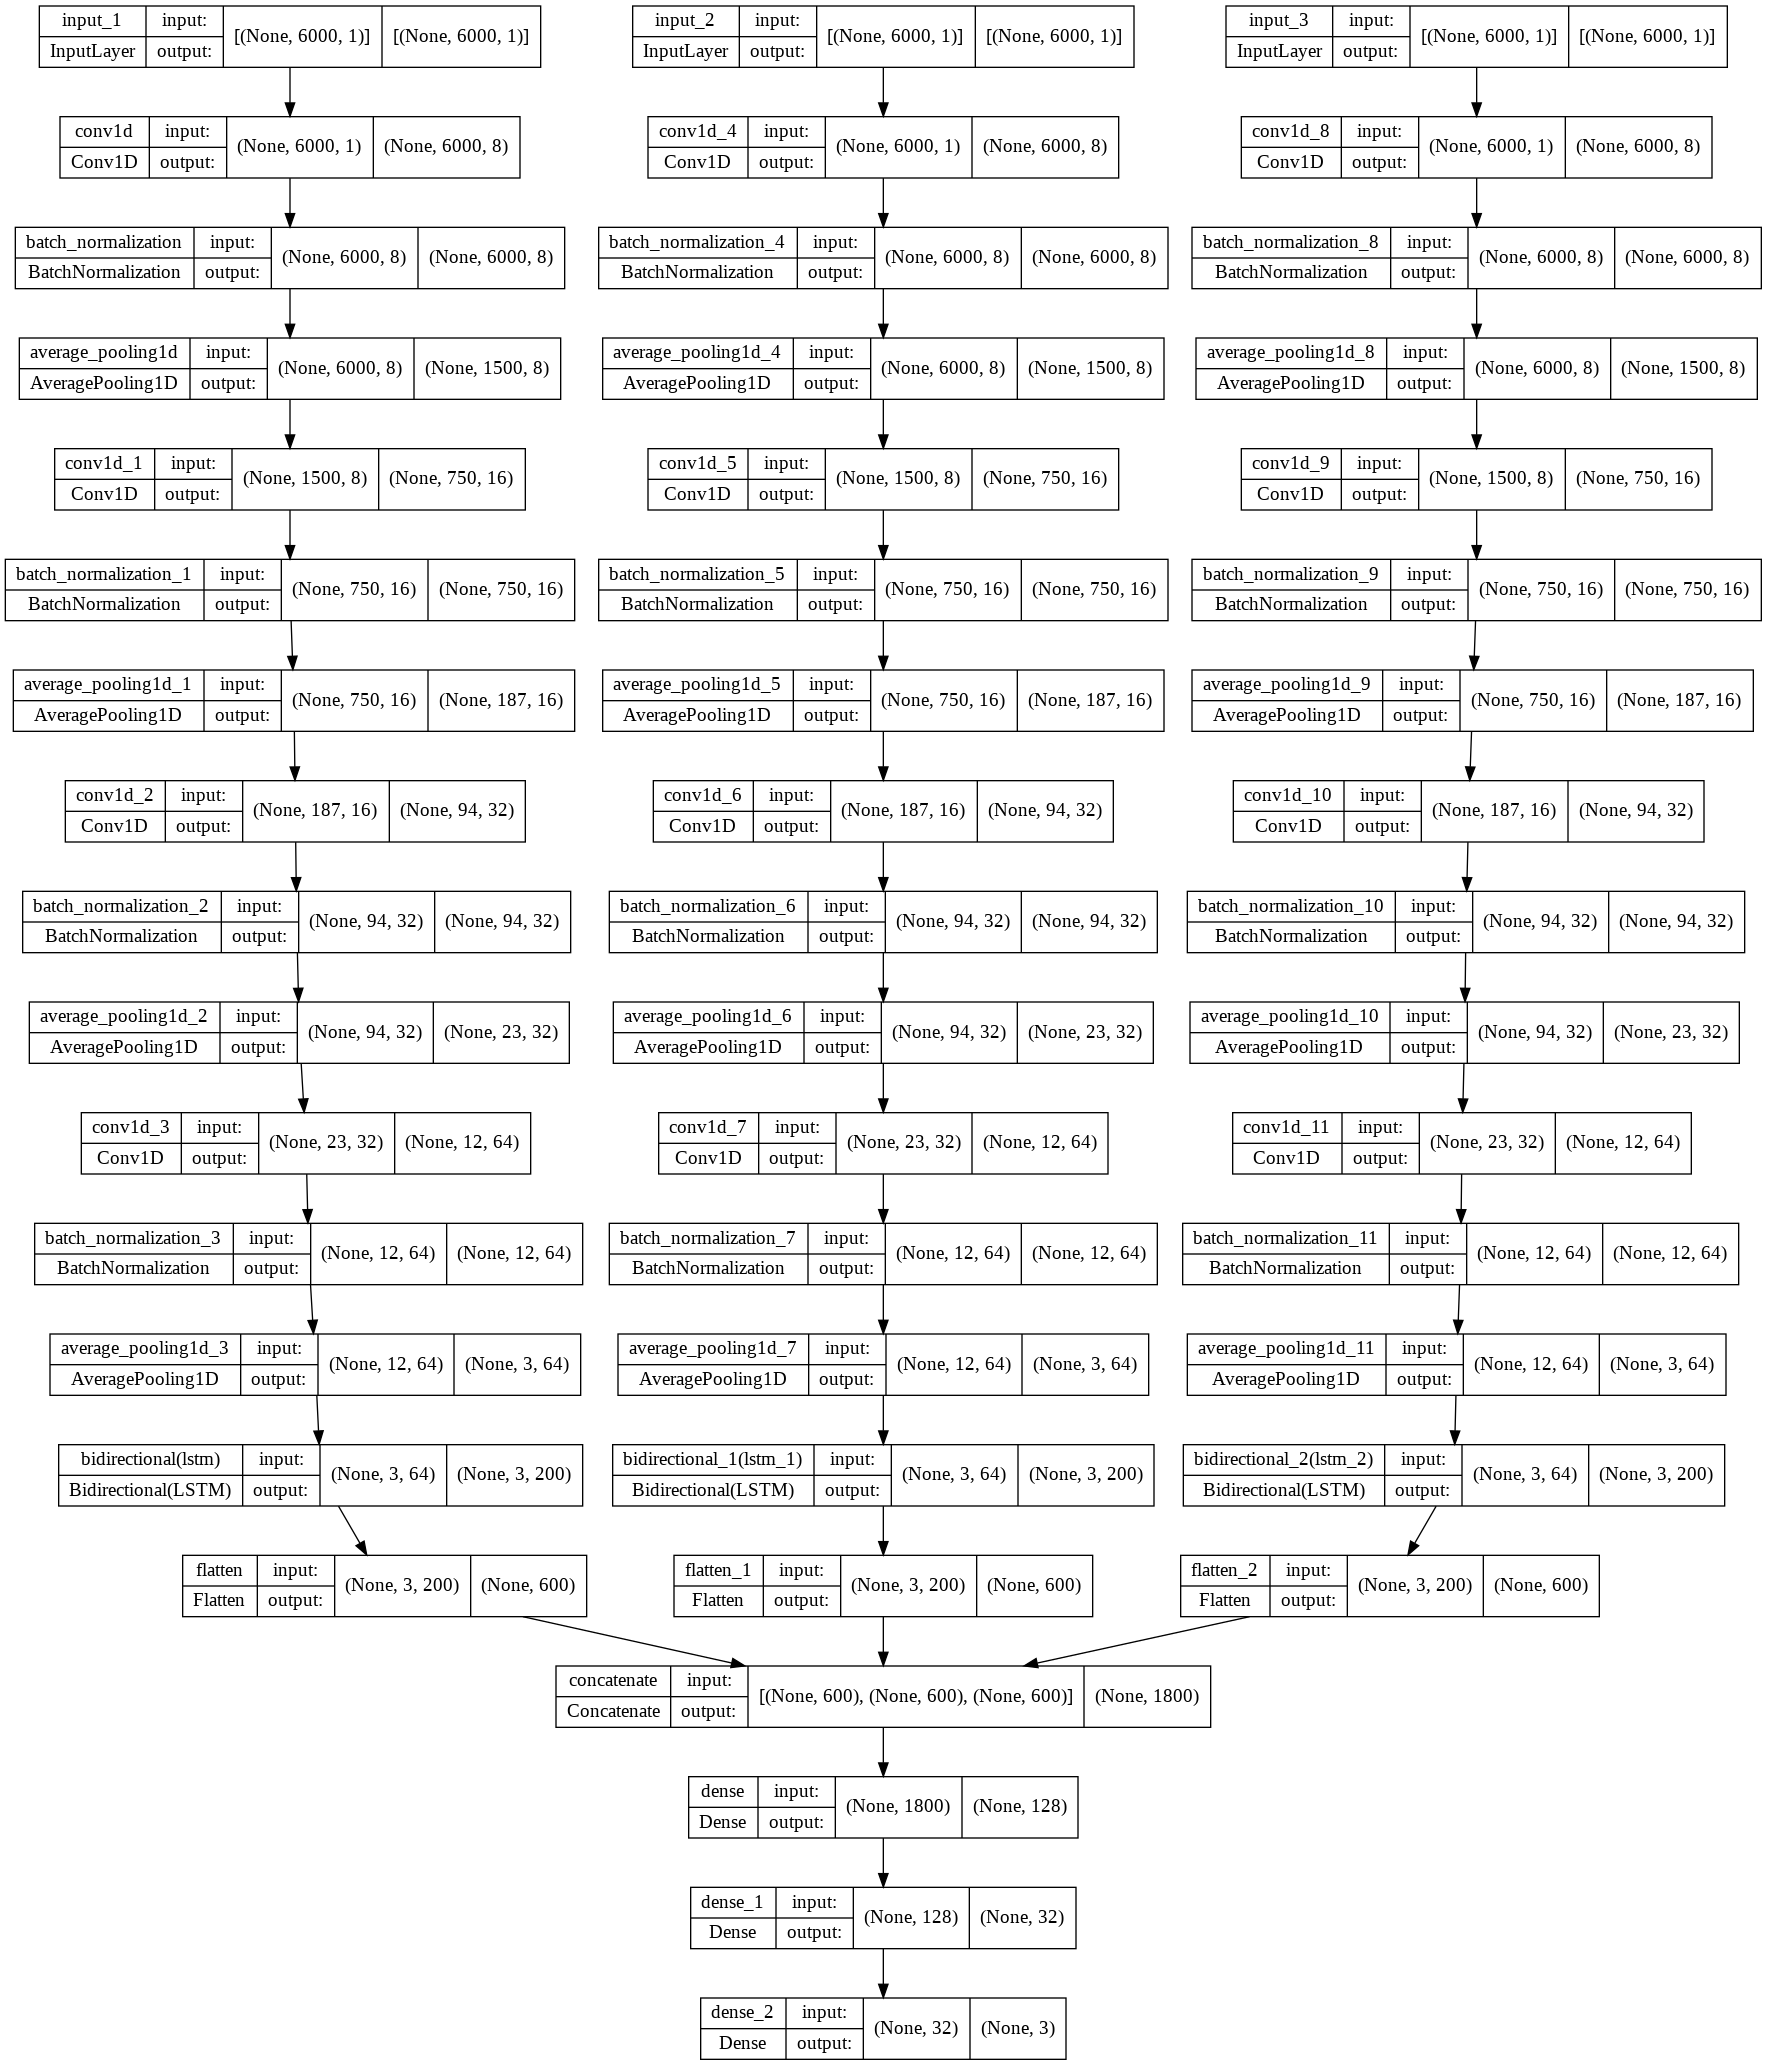

In [47]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)